In [ ]:
import pandas as pd # importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('anime.csv') # reading the csv file

In [ ]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
df.info() # checking the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
# there are some null values in our dataset
# total 7 columns out of which

In [ ]:
df.shape # checking the shape of the dataset

(12294, 7)

In [ ]:
#

#EDA and Preprocessing

In [ ]:
df.isna().sum()
# as we are see there are genre and rating columns contains missing values

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [ ]:
# Replace missing values in 'genre' column with unknown changiing with different
## values might lead to change in distribution.

df['genre'].fillna('Unknown', inplace=True)

<ipython-input-53-c1e4b0aba228>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna('Unknown', inplace=True)


In [ ]:
len(df.anime_id.unique())
# as we can see there are 12294 unique anime

12294

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
# as we see from the column episodes column feel it is numeric but
## by checking information episodes column looks object column

In [ ]:
## lets check value_count of episodes

categorical_episodes = df[pd.to_numeric(df['episodes'], errors='coerce').isnull()]['episodes'].unique() # as we see it contains Unknown values because we replaced entire null values in the dataset as unknown
categorical_episodes

array(['Unknown'], dtype=object)

In [ ]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce') # converting
## it to numerical variable
df['episodes'].fillna(df['episodes'].mode()[0], inplace=True) #Impute those NaNs with 0 values )

<ipython-input-58-3251cee7bc33>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['episodes'].fillna(df['episodes'].mode()[0], inplace=True)


In [ ]:
df.isna().sum()

,0
anime_id,0
name,0
genre,0
type,25
episodes,0
rating,230
members,0


In [ ]:
df.type.fillna('Unknown', inplace=True) # filling type column with Unknown
df.rating.fillna(0,inplace=True) # filling rating column with 0


<ipython-input-60-0895a4e4cc9d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.type.fillna('Unknown', inplace=True) # filling type column with Unknown
<ipython-input-60-0895a4e4cc9d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

##visualization

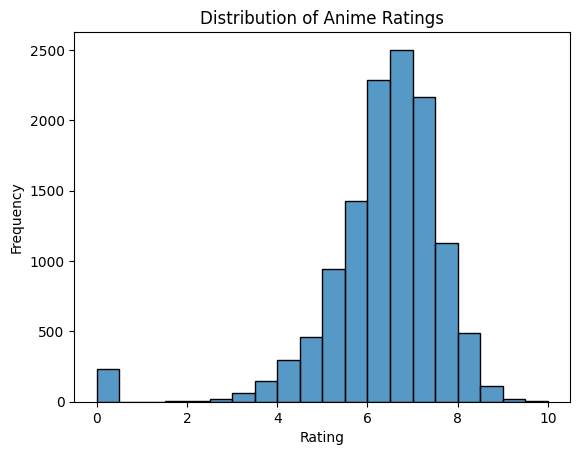

In [ ]:
sns.histplot(df['rating'], bins=20)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Feature Extraction

genre: This is a crucial feature as anime with similar genres are likely to be perceived as similar.
rating: User ratings can reflect the overall quality and appeal of an anime, contributing to similarity.
type: The type of anime (e.g., TV, movie, OVA) can be a factor in determining similarity.
members: The number of members who have watched or rated an anime might indicate its popularity and potentially influence similarity.

In [ ]:
# convet categorical feature into numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['genre'] = encoder.fit_transform(df['genre'])
df['type'] = encoder.fit_transform(df['type'])


In [ ]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,2686,0,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,161,5,64.0,9.26,793665
2,28977,Gintama°,534,5,51.0,9.25,114262
3,9253,Steins;Gate,3240,5,24.0,9.17,673572
4,9969,Gintama&#039;,534,5,51.0,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,2903,3,1.0,4.15,211
12290,5543,Under World,2903,3,1.0,4.28,183
12291,5621,Violence Gekiga David no Hoshi,2903,3,4.0,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,2903,3,1.0,4.98,175


##Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['rating', 'episodes', 'members','type','genre']] = scaler.fit_transform(df[['rating', 'episodes', 'members','type','genre']])

In [ ]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,0.822917,0.000000,0.000000,0.937,0.197872
1,5114,Fullmetal Alchemist: Brotherhood,0.049326,0.833333,0.034673,0.926,0.782770
2,28977,Gintama°,0.163603,0.833333,0.027518,0.925,0.112689
3,9253,Steins;Gate,0.992647,0.833333,0.012658,0.917,0.664325
4,9969,Gintama&#039;,0.163603,0.833333,0.027518,0.916,0.149186
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,0.889400,0.500000,0.000000,0.415,0.000203
12290,5543,Under World,0.889400,0.500000,0.000000,0.428,0.000176
12291,5621,Violence Gekiga David no Hoshi,0.889400,0.500000,0.001651,0.488,0.000211
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,0.889400,0.500000,0.000000,0.498,0.000168


In [ ]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
def recommend_anime(anime_name, similarity_threshold=0.8, top_n=10):


  # Find the index of the input anime
  index = df[df['name'] == anime_name].index[0]

  # Calculate cosine similarity with all other anime
  cosine_similarities = 1 - pairwise_distances(df[['genre', 'rating', 'type', 'members', 'episodes']], metric='cosine')

  # Get the top similar anime indices above the threshold
  similar_anime_indices = [i for i, similarity in enumerate(cosine_similarities[index])
                         if similarity >= similarity_threshold and i != index]

  # Limit the number of recommendations to top_n
  similar_anime_indices = similar_anime_indices[:top_n]

  # Return the names of the recommended anime
  recommended_anime = df['name'].iloc[similar_anime_indices].tolist()
  return recommended_anime

Input: It takes the name of the anime you want recommendations for and the number of recommendations to return (top_n).
Find Index: It locates the index of the input anime in your DataFrame.
Cosine Similarity: It calculates the cosine similarity between the input anime and all other anime in your DataFrame, using the selected features.
Similar Anime: It identifies the indices of the most similar anime based on the cosine similarity scores.
Recommendations: It returns a list of the names of the recommended anime.

In [ ]:
# Recommendations with a high similarity threshold
recommendations = recommend_anime('Fullmetal Alchemist: Brotherhood', similarity_threshold=0.9, top_n=5)
print(recommendations)  # Output: (A smaller list of very similar anime)

# Recommendations with a lower similarity threshold
recommendations = recommend_anime('Fullmetal Alchemist: Brotherhood', similarity_threshold=0.6, top_n=10)
print(recommendations)  # Output: (A larger list of more broadly similar anime)

['Gintama&#039;', 'Hunter x Hunter (2011)', 'Gintama', 'Code Geass: Hangyaku no Lelouch R2', 'Code Geass: Hangyaku no Lelouch']
['Gintama°', 'Steins;Gate', 'Gintama&#039;', 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou', 'Hunter x Hunter (2011)', 'Ginga Eiyuu Densetsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama&#039;: Enchousen', 'Clannad: After Story', 'Gintama']


Experimenting with Thresholds:

Higher similarity_threshold  will result in a smaller recommendation list containing anime that are very similar to the target anime.
Lower similarity_threshold  in a larger recommendation list with anime that are more broadly similar

##Data Splitting

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)  # 80% train, 20% test

In [ ]:
def recommend_anime_for_eval(anime_name, similarity_threshold=0.8, top_n=10):
    index = df[df['name'] == anime_name].index[0]
    cosine_similarities = 1 - pairwise_distances(df[['genre', 'rating', 'type', 'members', 'episodes']], metric='cosine')
    similar_anime_indices = [i for i, similarity in enumerate(cosine_similarities[index])
                             if similarity >= similarity_threshold and i != index]
    similar_anime_indices = similar_anime_indices[:top_n]

    # Return relevant items (True/False) instead of names for evaluation:
    relevant_items = [True if i in similar_anime_indices else False for i in range(len(df))]
    return relevant_items

#Interview Questions

1> Can you explain the difference between user-based and item-based collaborative filtering?
Focus: User-based focuses on similar users, while item-based focuses on similar items.

Logic: User-based assumes users with similar tastes will like similar items; item-based assumes users who liked an item will like similar ones.

Scalability: User-based has scalability issues with many users, while item-based is more scalable.

Cold Start: User-based struggles with new users and items, while item-based handles new items better but struggles with new users.

Diversity: User-based offers serendipitous recommendations, while item-based recommendations can be less diverse.
Sparsity: User-based is affected by sparse data, while item-based is less impacted.

2> What is collaborative filtering, and how does it work?

Collaborative filtering is a technique used by recommender systems to predict the preferences of a user by collecting information about the preferences of many other users.

how does it work:
1.Data collecton

2.Finding similar users/items

3.Predicitions

4/Recommendation